In [ ]:
import pandas as pd
import requests
from lxml import html
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/tourist_arrivals.csv',low_memory=False)
df.head()






,Year,Country,Arrivals,Pleasure/Vacation,Visiting_relations,Business,MICE,Sports,Health/Aurweda,Education,...,Other_purpose,male,female,Age(3-19),Age(20-29),Age(30-39),Age(40-49),Age(50-59),Age(60 &above),Id
0,2019,North America,119681,77315,37432,2563,927,904,183,312,...,6,60537,59144,15156,12410,19051,17543,19401,36100,NU2398876
1,2019,Canada,48729,22280,25581,410,156,151,49,84,...,0,24573,24156,7192,4667,6677,7015,8959,14219,NaN
2,2019,Mexico,2120,1939,54,61,33,9,3,19,...,2,1038,1082,155,369,538,344,312,402,NaN
3,2019,United States,68832,53096,11 797,2092,738,744,131,209,...,4,34924,33908,7809,7374,11836,10204,10130,21479,NaN
4,2019,Caribbean & Central America,938,776,82,42,25,8,1,4,...,0,541,397,51,183,267,176,132,129,NaN


In [ ]:
print('Number of missing rows in tourist_arrivals:',df.isna().sum().sum())
#print('Number of missing rows in yearly_arrivals:',dff.isna().sum().sum())


Number of missing rows in tourist_arrivals: 173


In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
null_feat = pd.DataFrame(len(df['Arrivals']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:
df.drop( 'Id', axis=1,inplace = True)

In [ ]:
print(df.isnull().sum())

Year                  0
Country               0
Arrivals              0
Pleasure/Vacation     0
Visiting_relations    0
                     ..
Age(20-29)            0
Age(30-39)            0
Age(40-49)            0
Age(50-59)            0
Age(60 &above)        0
Length: 21, dtype: int64


In [ ]:
print('Number of unique values in torist_arrivals:')
for col in df.columns:
    print(f"{col} - {df[col].nunique()}")

Number of unique values in torist_arrivals:
Year - 2
Country - 89
Arrivals - 195
Pleasure/Vacation - 197
Visiting_relations - 153
Business - 135
MICE - 114
Sports - 88
Health/Aurweda - 73
Education - 62
Religious - 26
officials - 20
Other_purpose - 16
male - 198
female - 197
Age(3-19) - 177
Age(20-29) - 190
Age(30-39) - 194
Age(40-49) - 188
Age(50-59) - 179
Age(60 &above) - 180


In [ ]:
print('Columns change to integer:')
for col in df.columns:
  if(col != "Country" and col != "Year"):
    print(col)
    df[col] = df[col].astype(str).str.replace('[\ \,]',"").replace('O',"0").apply(pd.to_numeric,errors='raise').astype(int)


Columns change to integer:
Arrivals
Pleasure/Vacation
Visiting_relations
Business
MICE
Sports
Health/Aurweda
Education
Religious
officials
Other_purpose
male
female
Age(3-19)
Age(20-29)
Age(30-39)
Age(40-49)
Age(50-59)
Age(60 &above)


<ipython-input-120-77e719ee4fdc>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
 print("Check any Naan values exits after the conversion")
 df.isna().any()


Check any Naan values exits after the conversion


Year                  False
Country               False
Arrivals              False
Pleasure/Vacation     False
Visiting_relations    False
                      ...  
Age(20-29)            False
Age(30-39)            False
Age(40-49)            False
Age(50-59)            False
Age(60 &above)        False
Length: 21, dtype: bool

In [ ]:

pd.set_option('display.max_rows', 20)
df

,Year,Country,Arrivals,Pleasure/Vacation,Visiting_relations,Business,MICE,Sports,Health/Aurweda,Education,...,officials,Other_purpose,male,female,Age(3-19),Age(20-29),Age(30-39),Age(40-49),Age(50-59),Age(60 &above)
0,2019,North America,119681,77315,37432,2563,927,904,183,312,...,15,6,60537,59144,15156,12410,19051,17543,19401,36100
1,2019,Canada,48729,22280,25581,410,156,151,49,84,...,6,0,24573,24156,7192,4667,6677,7015,8959,14219
2,2019,Mexico,2120,1939,54,61,33,9,3,19,...,0,2,1038,1082,155,369,538,344,312,402
3,2019,United States,68832,53096,11797,2092,738,744,131,209,...,9,4,34924,33908,7809,7374,11836,10204,10130,21479
4,2019,Caribbean & Central America,938,776,82,42,25,8,1,4,...,0,0,541,397,51,183,267,176,132,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020,Oman,1045,983,54,8,0,0,0,0,...,0,0,589,456,327,271,248,123,53,23
196,2020,Qatar,129,115,7,1,5,0,1,0,...,0,0,94,35,21,17,37,26,16,12
197,2020,Saudi Arabia,4755,4432,286,1,0,3,33,0,...,0,0,2547,2208,1876,979,951,500,310,139
198,2020,Emirates,352,333,14,1,2,1,1,0,...,0,0,212,140,46,68,108,61,50,19


In [ ]:
df2 = df.copy()
df2 = df2.drop(['Country', 'Year'], axis=1)
(df2 < 0).any()


Arrivals              False
Pleasure/Vacation     False
Visiting_relations    False
Business              False
MICE                  False
Sports                False
Health/Aurweda        False
Education             False
Religious             False
officials             False
Other_purpose         False
male                  False
female                 True
Age(3-19)             False
Age(20-29)            False
Age(30-39)             True
Age(40-49)             True
Age(50-59)             True
Age(60 &above)         True
dtype: bool

In [ ]:
#Print columns that have negative values
for cols in df2.columns:
  #print(df2[cols])
  if(df2[cols].lt(0).any()):
      print(cols)

female
Age(30-39)
Age(40-49)
Age(50-59)
Age(60 &above)


In [ ]:
#Convert negatives to positive
df2['female'] = df2['female'].abs()
df2['Age(30-39)'] = df2['Age(30-39)'].abs()
df2['Age(40-49)'] = df2['Age(40-49)'].abs()
df2['Age(50-59)'] = df2['Age(50-59)'].abs()
df2['Age(60 &above)'] = df2['Age(60 &above)'].abs()

In [ ]:
#Print columns that have negative values
for cols in df2.columns:
  #print(df2[cols])
  if(df2[cols].lt(0).any()):
      print(cols)

In [ ]:
df = pd.merge(df,df2)
df

,Year,Country,Arrivals,Pleasure/Vacation,Visiting_relations,Business,MICE,Sports,Health/Aurweda,Education,...,officials,Other_purpose,male,female,Age(3-19),Age(20-29),Age(30-39),Age(40-49),Age(50-59),Age(60 &above)
0,2019,North America,119681,77315,37432,2563,927,904,183,312,...,15,6,60537,59144,15156,12410,19051,17543,19401,36100
1,2019,Canada,48729,22280,25581,410,156,151,49,84,...,6,0,24573,24156,7192,4667,6677,7015,8959,14219
2,2019,Mexico,2120,1939,54,61,33,9,3,19,...,0,2,1038,1082,155,369,538,344,312,402
3,2019,United States,68832,53096,11797,2092,738,744,131,209,...,9,4,34924,33908,7809,7374,11836,10204,10130,21479
4,2019,Caribbean & Central America,938,776,82,42,25,8,1,4,...,0,0,541,397,51,183,267,176,132,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020,Oman,1045,983,54,8,0,0,0,0,...,0,0,589,456,327,271,248,123,53,23
192,2020,Qatar,129,115,7,1,5,0,1,0,...,0,0,94,35,21,17,37,26,16,12
193,2020,Saudi Arabia,4755,4432,286,1,0,3,33,0,...,0,0,2547,2208,1876,979,951,500,310,139
194,2020,Emirates,352,333,14,1,2,1,1,0,...,0,0,212,140,46,68,108,61,50,19


In [ ]:
df.describe()

,Year,Arrivals,Pleasure/Vacation,Visiting_relations,Business,MICE,Sports,Health/Aurweda,Education,Religious,officials,Other_purpose,male,female,Age(3-19),Age(20-29),Age(30-39),Age(40-49),Age(50-59),Age(60 &above)
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2019.510204,20356.250000,17300.556122,1941.750000,601.198980,189.163265,122.581633,123.642857,44.535714,5.510204,1.923469,1.224490,10380.653061,9969.846939,1950.964286,3439.469388,4698.821429,3312.209184,3241.867347,3756.459184
std,0.501176,48429.514146,41015.128320,5835.594571,2688.754201,584.357990,504.015566,744.173136,178.285233,20.444669,6.450542,4.098857,25939.853825,23333.613132,4688.043440,8304.103359,11366.428119,8315.959431,8042.050676,9298.488347
min,2019.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,9.000000,0.000000,3.000000,4.000000,2.000000,0.000000,0.000000
25%,2019.000000,869.250000,791.500000,32.000000,10.750000,7.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,435.250000,390.500000,50.250000,174.500000,242.500000,128.250000,101.750000,72.750000
50%,2020.000000,3075.000000,2694.500000,130.500000,49.500000,27.000000,10.500000,7.000000,2.000000,0.000000,0.000000,0.000000,1530.500000,1491.000000,278.500000,622.500000,802.000000,497.500000,395.000000,371.500000
75%,2020.000000,14606.250000,11686.500000,731.750000,240.750000,106.500000,64.500000,29.250000,19.000000,3.000000,1.000000,1.000000,7375.250000,6365.500000,1351.750000,2224.250000,2982.500000,2168.250000,2264.750000,2196.750000
max,2020.000000,355002.000000,279345.000000,39111.000000,33803.000000,6035.000000,6053.000000,8397.000000,1790.000000,228.000000,64.000000,39.000000,234664.000000,169315.000000,32286.000000,63263.000000,93061.000000,74955.000000,61095.000000,67421.000000


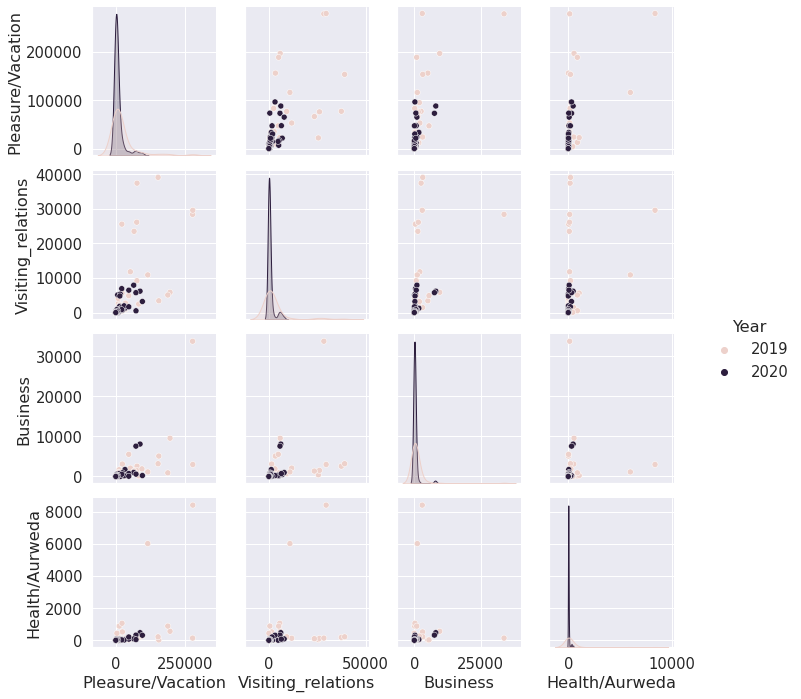

In [ ]:

cols = ['Year','Pleasure/Vacation','Visiting_relations','Business','Health/Aurweda']

sns.pairplot(df[cols], hue="Year", )
plt.show()

In [ ]:

px.bar(df, x="Year", y="Arrivals", 
       labels={"Year":"Year", "Arrivals": "Tourists (in millions)"},
       title="Foreign tourists arriving in Sri lanka.")

In [ ]:
Median_world_sales = df['Arrivals'].median()

Text(0.5, 1.0, '\nTop 10 highest tourist Arrivals Countries in 2019\n')

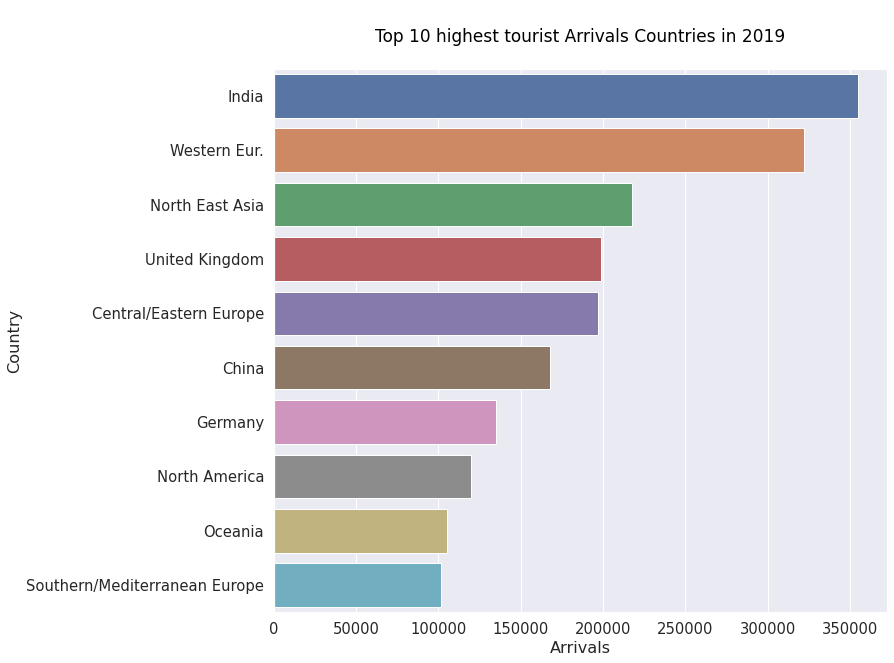

In [ ]:
sns.set(font_scale=1.34)
fig,ax = plt.subplots(figsize=(11,10))

a = sns.barplot(y='Country', x='Arrivals', 
            data=df.loc[df['Year'] == 2019].sort_values(by='Arrivals', ascending=False).head(10))


plt.title('\nTop 10 highest tourist Arrivals Countries in 2019\n', size=17, color='black')

Text(0.5, 1.0, '\nTop 10 highest tourst Arrivals Countries in 2020\n')

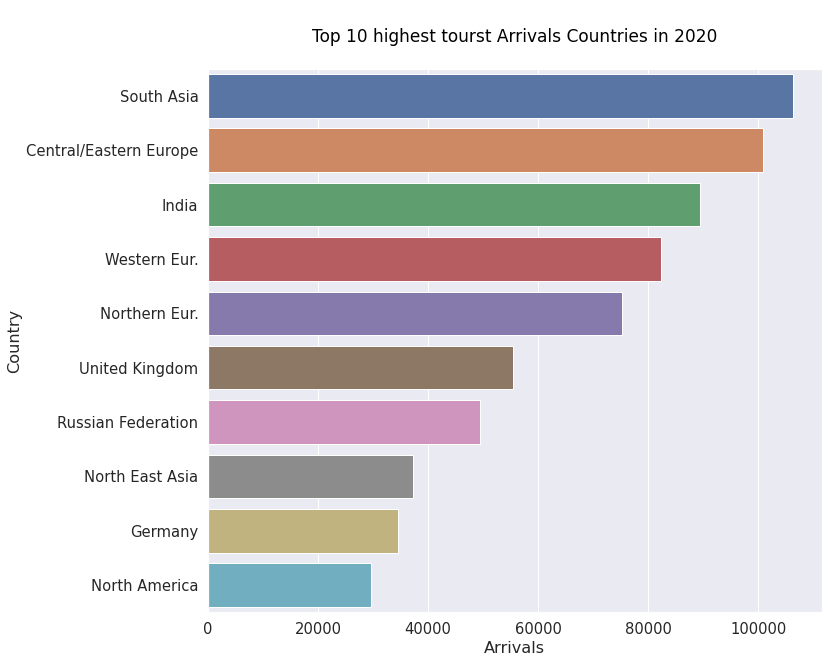

In [ ]:
sns.set(font_scale=1.34)
fig,ax = plt.subplots(figsize=(11,10))

a = sns.barplot(y='Country', x='Arrivals', 
            data=df.loc[df['Year'] == 2020].sort_values(by='Arrivals', ascending=False).head(10))


plt.title('\nTop 10 highest tourst Arrivals Countries in 2020\n', size=17, color='black')

Text(0.5, 1.0, '\nTop 10 highest turist Arrivals Countries\n')

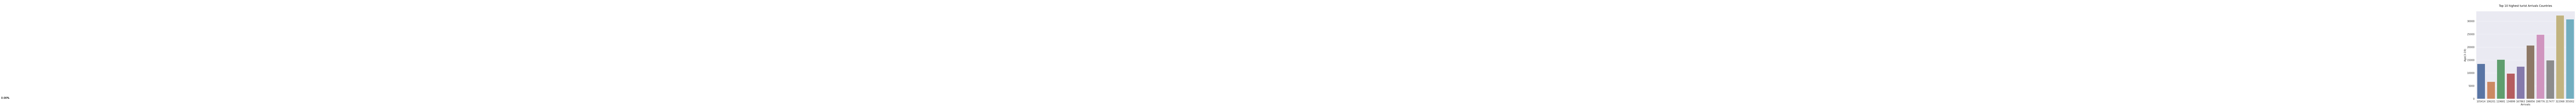

In [ ]:
sns.set(font_scale=1.34)
fig,ax = plt.subplots(figsize=(11,10))
age = ['Age(3-19)','Age(20-29)','Age(30-39)','Age(40-49)','Age(50-59)','Age(60 &above)']
a = sns.barplot(y= 'Age(3-19)', x='Arrivals', 
            data=df.sort_values(by='Arrivals', ascending=False).head(10))
sum_WS = df['Arrivals'].sum()
for p in ax.patches:
    ax.text(p.get_width()-252, p.get_y()+0.68, '{:.2f}%'.format((p.get_width()/sum_WS)*100))

plt.title('\nTop 10 highest turist Arrivals Countries\n', size=17, color='black')

In [ ]:
#Plotting with Plotly. A graph with animation frame
fig1 = px.bar(df, x="Country", y="Arrivals", animation_frame="Year", 
       labels={"Year":"Year", "Arrivals": "Tourists (in millions)"},
       title="Country of origin foreign tourists in India (2014-2020).")
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

yranges = {2016:[0, 2500000]}

for f in fig1.frames:
    if int(f.name) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.name)])
fig1.show()

In [ ]:
vp = pd.read_csv('/content/drive/MyDrive/dataset/Visited_Places.csv',low_memory=False)
vp.head()



,year,Visited placecs,Arrivals,Revenue (in Rs.)
0,2020,Colombo National Museum,11762,11813400
1,2020,Natural History Museum,1053,818000
2,2020,Dutch Museum *,0,0
3,2020,Independence Memorial Museum,478,137400
4,2020,Hambantota National Museum,22,10800


Text(0.5, 1.0, '\nTop 10 highest tourist Visited Places in 2019\n')

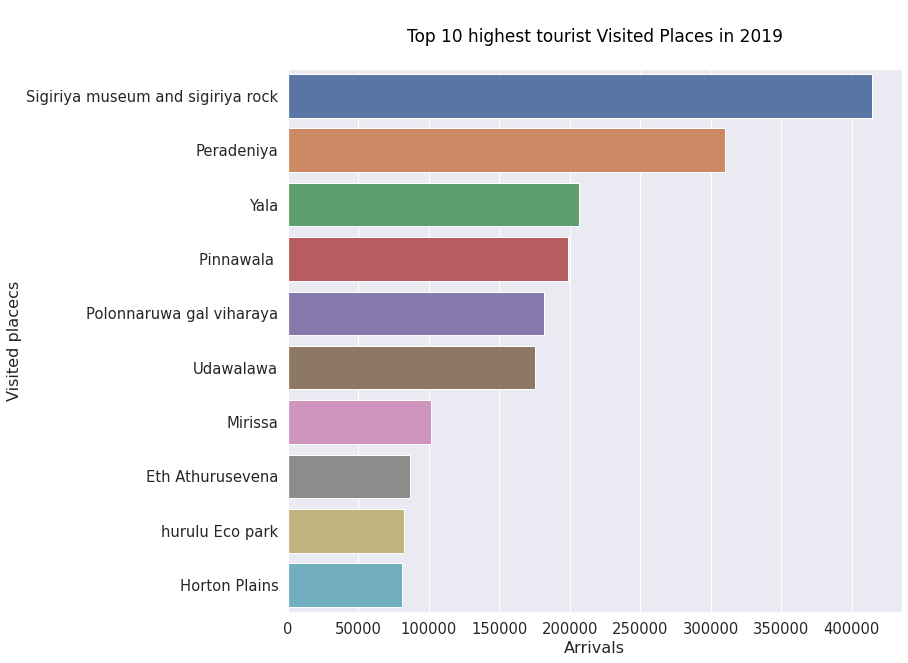

In [ ]:
sns.set(font_scale=1.34)
fig,ax = plt.subplots(figsize=(11,10))
a = sns.barplot(y='Visited placecs', x='Arrivals', 
            data=vp.loc[vp['year'] == 2019].sort_values(by='Arrivals', ascending=False).head(10))

plt.title('\nTop 10 highest tourist Visited Places in 2019\n', size=17, color='black')





Text(0.5, 1.0, '\nTop 10 highest tourist Visited Places in 2020\n')

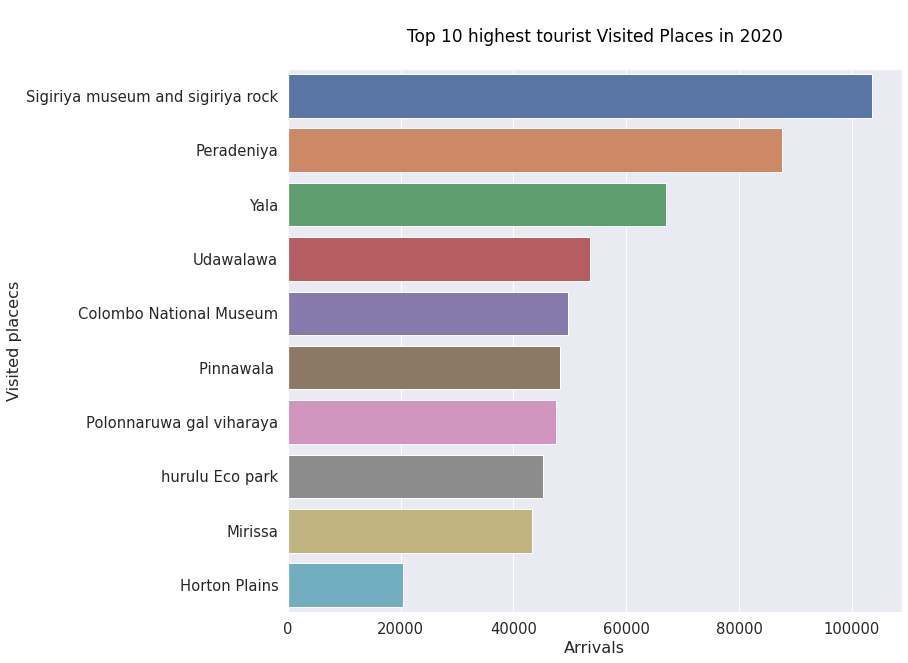

In [ ]:
sns.set(font_scale=1.34)
fig,ax = plt.subplots(figsize=(11,10))
a = sns.barplot(y='Visited placecs', x='Arrivals', 
            data=vp.loc[vp['year'] == 2020].sort_values(by='Arrivals', ascending=False).head(10))

plt.title('\nTop 10 highest tourist Visited Places in 2020\n', size=17, color='black')

In [ ]:
x_lable = ["Age(3-19)","Age(20-29)","Age(30-39)","Age(40-49)","Age(50-59)","Age(60 &above)"]
ds = df.groupby(['Year'])[x_lable].sum()
ds

,Age(3-19),Age(20-29),Age(30-39),Age(40-49),Age(50-59),Age(60 &above)
Year,,,,,,
2019,300160,507159,678835,490050,479399,539394
2020,82229,166977,242134,159143,156007,196872


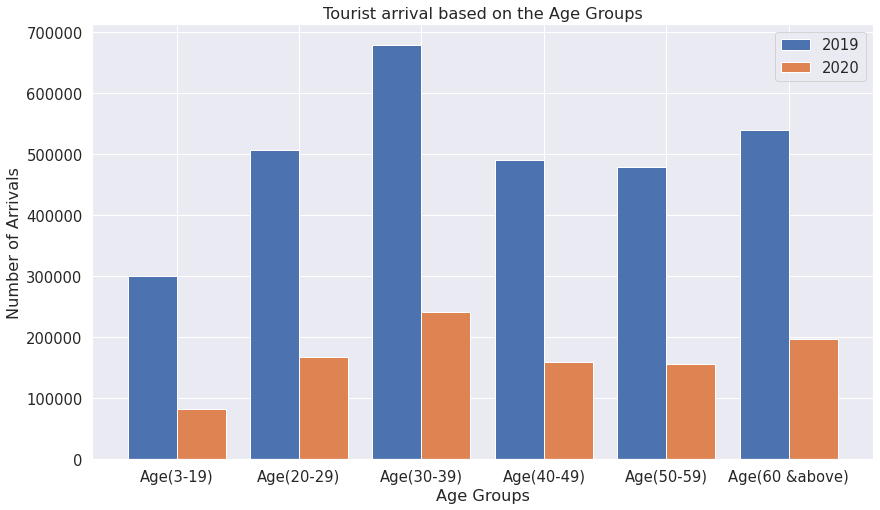

In [ ]:

x_year = ds.iloc[:1].values.flatten()
y_year = ds.iloc[1:].values.flatten()
  
X_axis = np.arange(len(x_lable))
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8) 
plt.bar(X_axis - 0.2, x_year, 0.4, label = '2019')
plt.bar(X_axis + 0.2, y_year, 0.4, label = '2020')
  
plt.xticks(X_axis, x_lable)
plt.xlabel("Age Groups")
plt.ylabel("Number of Arrivals")
plt.title("Tourist arrival based on the Age Groups")
plt.legend()
plt.show()

In [ ]:
countries = pd.get_dummies(df['Country'])
years = pd.get_dummies(df['Year']).astype(int)
df = pd.concat([df, countries, years], axis=1)

df = df.drop(df.columns[[0, 1]], axis=1)
df

,Arrivals,Pleasure/Vacation,Visiting_relations,Business,MICE,Sports,Health/Aurweda,Education,Religious,officials,...,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Vietnam,Western Eur.,2019,2020
0,119681,77315,37432,2563,927,904,183,312,24,15,...,0,0,0,0,0,0,0,0,1,0
1,48729,22280,25581,410,156,151,49,84,12,6,...,0,0,0,0,0,0,0,0,1,0
2,2120,1939,54,61,33,9,3,19,0,0,...,0,0,0,0,0,0,0,0,1,0
3,68832,53096,11797,2092,738,744,131,209,12,9,...,0,0,0,0,0,1,0,0,1,0
4,938,776,82,42,25,8,1,4,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1045,983,54,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192,129,115,7,1,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
193,4755,4432,286,1,0,3,33,0,0,0,...,0,0,0,0,0,0,0,0,0,1
194,352,333,14,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.isna().any()

Arrivals              False
Pleasure/Vacation     False
Visiting_relations    False
Business              False
MICE                  False
                      ...  
United States         False
Vietnam               False
Western Eur.          False
2019                  False
2020                  False
Length: 110, dtype: bool

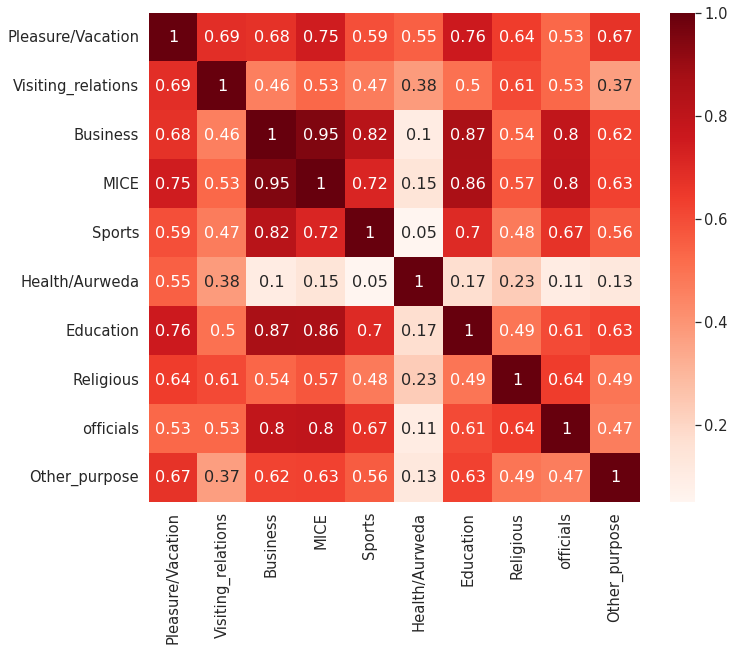

In [ ]:
plt.figure(figsize=(11,9))
cor = df[['Pleasure/Vacation','Visiting_relations','Business','MICE','Sports','Health/Aurweda','Education','Religious','officials','Other_purpose']].astype(str).astype(float).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
import numpy as np
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

r1 = pearson_r(df['Arrivals'], df['Visiting_relations'])
r2= pearson_r(df['Arrivals'], df['Business'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df.iloc[:,1], df.iloc[:,j])
        if abs(r) >= 0.80 and df.columns[j]  not in name_c:
                    name_c.append(df.columns[j]) 
print()
print('* Lenght of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c)
features_df = df[['Pleasure/Vacation','Visiting_relations','Business','MICE','Sports','Health/Aurweda','Education','Religious','officials','Other_purpose']]


* Lenght of columns assuming r >=0.80: 9
name_c = ['Pleasure/Vacation', 'male', 'female', 'Age(3-19)', 'Age(20-29)', 'Age(30-39)', 'Age(40-49)', 'Age(50-59)', 'Age(60 &above)']


In [ ]:
features_df = df[['Pleasure/Vacation','Visiting_relations','Business','MICE','Sports'
,'Health/Aurweda','Education','Religious','officials','Other_purpose']]

# Create the X and y arrays
X = features_df
y = df['Arrivals']
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
# Hypo Parameters we want to try
param_grid = {
    'n_estimators': [100, 500, 1000, 3000],
    'max_depth': [5, 10, 30, 60, 100, None]
   
}


In [ ]:
# Define the grid search we want to run. For K-Fold cross validation I use K=5
gs_cv_gradient = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid, n_jobs=-1, cv = 5)
gs_cv_randomf = GridSearchCV(ensemble.RandomForestRegressor(), param_grid, n_jobs=-1, cv = 5)

In [ ]:
# Run the grid search on the training data.
gs_cv_gradient.fit(X_train, y_train)
gs_cv_randomf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 30, 60, 100, None],
                         'n_estimators': [100, 500, 1000, 3000]})

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
gs_cv_gradient.score(X_test, y_test)


0.9790943798116372

In [ ]:
gs_cv_randomf.score(X_test, y_test)

0.9606801501042427

In [ ]:
gs_cv_gradient.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [ ]:
gs_cv_randomf.best_params_

{'max_depth': None, 'n_estimators': 500}

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
print('Mean Absolute Error for test set using Gradien Boost: '+str(mean_absolute_error(y_test, gs_cv_gradient.predict(X_test))))


Mean Absolute Error for test set using Gradien Boost: 1741.8607395121048


In [ ]:
print('r2 score Error for test set using Gradien Boost: '+str(r2_score(y_test, gs_cv_gradient.predict(X_test))))


r2 score Error for test set using Gradien Boost: 0.9790943798116372


In [ ]:
print('Mean Absolute Error for test set using Random Forest: '+str(mean_absolute_error(y_test, gs_cv_randomf.predict(X_test))))


Mean Absolute Error for test set using Random Forest: 2355.32413559322


In [ ]:
print('r2 score Error for test set using Random Forest: '+str(r2_score(y_test, gs_cv_randomf.predict(X_test))))

r2 score Error for test set using Random Forest: 0.9606801501042427


In [ ]:
import numpy as np

In [ ]:
print(gs_cv_gradient.best_estimator_.feature_importances_)

[8.26665769e-01 1.96491099e-03 4.63083338e-03 1.49382916e-03
 3.68712968e-04 1.10827363e-02 6.70008222e-03 2.58958793e-02
 2.16484939e-03 1.19032398e-01]


In [ ]:
# These are the feature labels from our data set
feature_labels = np.array(['Pleasure/Vacation','Visiting_relations','Business','MICE',
                           'Sports','Health/Aurweda','Education','Religious','officials','Other_purpose'])

# Create a numpy array based on the model's feature importances
importance = gs_cv_gradient.best_estimator_.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

Health/Aurweda - 0.04%
MICE - 0.07%
Business - 0.08%
Education - 0.10%
Visiting_relations - 0.15%
Religious - 0.28%
Sports - 0.37%
Other_purpose - 0.56%
officials - 3.79%
Pleasure/Vacation - 94.55%


In [ ]:
# Create a numpy array based on the model's feature importances
importance_r = gs_cv_randomf.best_estimator_.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance_r.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance_r[index] * 100.0)))

Other_purpose - 0.54%
Sports - 0.84%
Visiting_relations - 1.18%
Health/Aurweda - 1.30%
officials - 1.60%
MICE - 1.93%
Business - 2.43%
Education - 5.30%
Religious - 19.72%
Pleasure/Vacation - 65.15%


                    GradientBoost  RandomForest
Pleasure/Vacation        0.945489      0.651513
officials                0.037933      0.016023
Other_purpose            0.005619      0.005430
Sports                   0.003737      0.008400
Religious                0.002832      0.197196
Visiting_relations       0.001472      0.011840
Education                0.001009      0.053006
Business                 0.000796      0.024277
MICE                     0.000735      0.019266
Health/Aurweda           0.000378      0.013050

The six most important features:
Pleasure/Vacation    0.651513
Religious            0.197196
Education            0.053006
Business             0.024277
MICE                 0.019266
officials            0.016023
dtype: float64


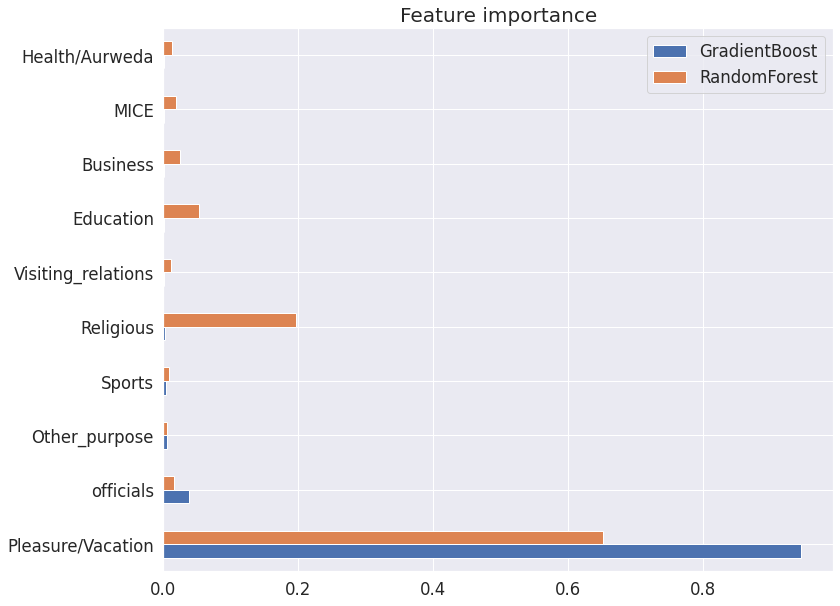

In [ ]:
#RandomForest
impor_ExTree=importance_r
indices_1 = np.argsort(impor_ExTree)[::-1]

#GradientBoost
impor_Grad_boost=importance
indices_2= np.argsort(impor_Grad_boost)[::-1]

featimp_1 = pd.Series(impor_ExTree, index=feature_labels).sort_values(ascending=False)
featimp_2 = pd.Series(impor_Grad_boost, index=feature_labels).sort_values(ascending=False)

Table_impor= pd.DataFrame({'GradientBoost': featimp_2,'RandomForest': featimp_1})
Table_impor=Table_impor.sort_values('GradientBoost', ascending=False)
print(Table_impor)
print()
print('The six most important features:')
print(featimp_1[0:6])

sns.set_context('notebook', font_scale=1.5)
Table_impor.plot(kind='barh', figsize=(12,10))
plt.title('Feature importance', size=20);

#LSTM deep learning started

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/dataset/yearly_arrivals.csv',index_col='Year',parse_dates=True)
#dff.index.freq='MS'


In [ ]:
dff.head()

,arrivals
Year,
1971-01-01,5931
1971-02-01,6570
1971-03-01,5166
1971-04-01,1539
1971-05-01,952


In [ ]:
dff['arrivals'] = dff['arrivals'].str.replace(" ", "").astype(int)


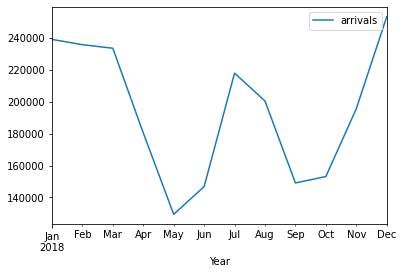

In [ ]:
dff['2018-01-01':'2018-12-01'].plot()

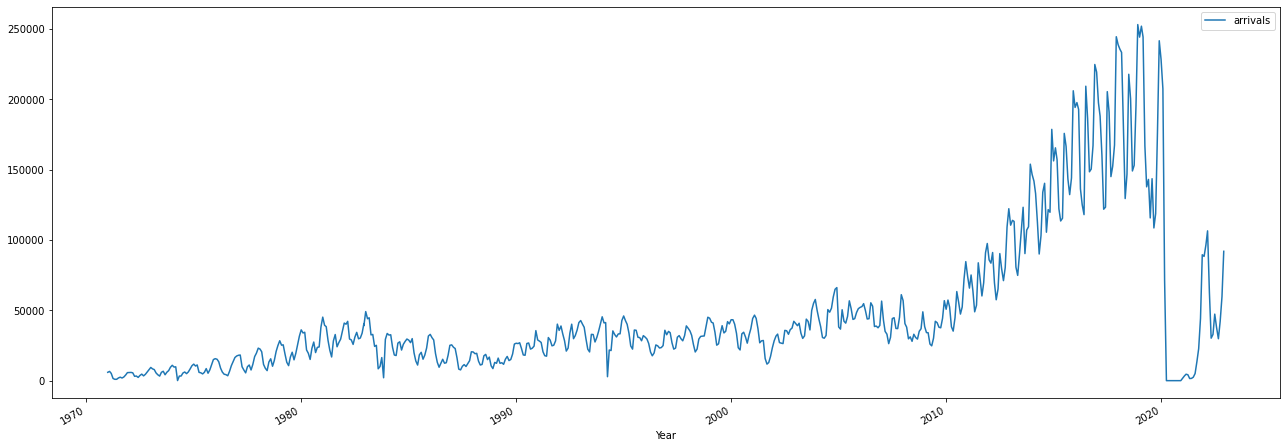

In [ ]:
dff.plot(figsize=(22,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dff = dff['2010-01-01':'2018-12-01']

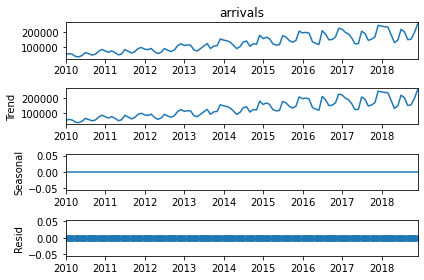

In [ ]:
results = seasonal_decompose(x=dff['arrivals'],model='additive', period=1)
results.plot();

In [ ]:
len(dff)

108

In [ ]:
train = dff.iloc[:96]
test = dff[96:]

#train = dff[dff. != 2018]

In [ ]:
len(train)

96

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
dff.head(),dff.tail()

(            arrivals
 Year                
 2010-01-01     50757
 2010-02-01     57300
 2010-03-01     52352
 2010-04-01     38300
 2010-05-01     35213,             arrivals
 Year                
 2022-08-01     37760
 2022-09-01     29802
 2022-10-01     42026
 2022-11-01     59759
 2022-12-01     91961)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.20048663],
       [0.22633103],
       [0.20678677],
       [0.15128234],
       [0.13908891],
       [0.1766804 ],
       [0.25018466],
       [0.22079323],
       [0.18698577],
       [0.20685787]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.20048663 0.22633103 0.20678677 0.15128234 0.13908891 0.1766804
 0.25018466 0.22079323 0.18698577 0.20685787 0.28538644 0.33427078]
Predict this y: 
 [[0.29307301]]


In [ ]:
X.shape

(1, 12, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
132/132 [==============================] - 2s 7ms/step - loss: 0.0458
Epoch 2/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0368
Epoch 3/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0320
Epoch 4/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0332
Epoch 5/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0291
Epoch 6/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0250
Epoch 7/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0250
Epoch 8/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0238
Epoch 9/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0201
Epoch 10/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0190
Epoch 11/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0156
Epoch 12/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0150
Epoch 13/50
132/132 [====

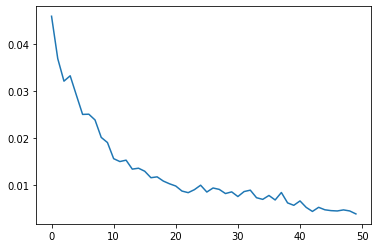

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 191ms/step


array([[0.25477338]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94373324])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
test_predictions

[array([1.0272913], dtype=float32),
 array([0.94014966], dtype=float32),
 array([0.88876474], dtype=float32),
 array([0.7194542], dtype=float32),
 array([0.4748187], dtype=float32),
 array([0.48907515], dtype=float32),
 array([0.9287576], dtype=float32),
 array([0.8554233], dtype=float32),
 array([0.57763785], dtype=float32),
 array([0.60917336], dtype=float32),
 array([0.7481069], dtype=float32),
 array([1.1140544], dtype=float32)]

In [ ]:
test.head()

,arrivals
Year,
2018-01-01,238924
2018-02-01,235618
2018-03-01,233382
2018-04-01,180429
2018-05-01,129466


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
dff = dff.drop

In [ ]:
#test = dff['2018-01-01':'2018-12-01']

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-211-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


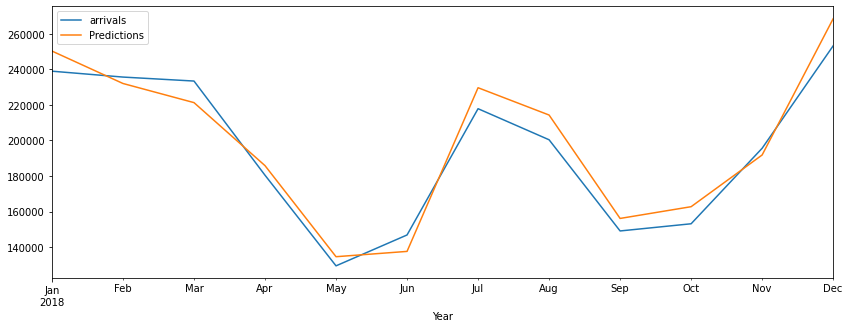

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['arrivals'],test['Predictions']))
print("RMSE: {:.2f}".format(rmse))

mape = mean_absolute_percentage_error(test['arrivals'], test['Predictions'])
print("MAPE: {:.2f}".format(mape)+"%")


RMSE: 9790.21
MAPE: 0.05%
